# DS 861 | Final Exam | Di Wang

## Overview

The data set consists of 20640 observations and 9 features, plus 1 dependent variable. The goal of this dataset is to use the predictors to predict the median house value (median house value). Each observation corresponds to a particular house.

### 1. Preprocess data:

In [1]:
#imput the dataset
import pandas as pd
House = pd.read_csv('housing.csv')
House.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
#delete the missing value
House.dropna(inplace = True)
House.shape 
#20433 observations and 9 features, 1 dependent variable

(20433, 10)

### 2. Inferences:

(a) Build a linear regression model using all features and all observations. Perform
model diagnostics. Also, suggest potential transformation(s) to the variable(s)
(provide evidence, and specify which variable(s) to transform). You do not need
to refit the model.

In [3]:
#General import for question 2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import statsmodels.api as sm
import warnings # Suppress warnings because they are annoying
warnings.filterwarnings('ignore') 

In [4]:
#create dummy variables for ocean_proximity 
ocean_pro_dummy  = pd.get_dummies(House['ocean_proximity'], prefix = 'oce_pro',drop_first=True)
del House['ocean_proximity']
House = pd.concat([House, ocean_pro_dummy], axis=1)
House.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,oce_pro_INLAND,oce_pro_ISLAND,oce_pro_NEAR BAY,oce_pro_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


In [5]:
#define X and y
X1 = House.copy()
X1.drop("median_house_value", inplace = True, axis = 1)
y1 = House["median_house_value"]

In [6]:
X1_con = sm.add_constant(X1)
lr = sm.OLS(y1, X1_con).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     3112.
Date:                Tue, 19 May 2020   Prob (F-statistic):               0.00
Time:                        16:29:36   Log-Likelihood:            -2.5655e+05
No. Observations:               20433   AIC:                         5.131e+05
Df Residuals:                   20420   BIC:                         5.132e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -2.27e+06    8.8e+04    -25.791      0.000   -2.44e+06    -2.1e+06
longitude          -2.681e+04   1019.651    -26.296      0.000   -2.88e+04   -2.48e+04
latitude           -2.548e+04   1004.702    -25.363      0.000   -2.75e+04   -2.35e+04
housing_median_age  1072.5200     43.886     24.439      0.000     986.501    1158.540
total_rooms           -6.1933      0.791     -7.825      0.000      -7.745      -4.642
total_bedrooms       100.5563      6.869     14.640      0.000      87.093     114.019
population           -37.9691      1.076    -35.282      0.000     -40.078     -35.860
households            49.6173      7.451      6.659      0.000      35.012      64.222
median_income       3.926e+04    338.005    116.151      0.000    3.86e+04    3.99e+04
oce_pro_INLAND     -3.928e+04   1744.258    -22.522      0.000   -4.27e+04   -3.59e+04
oce_pro_ISLAND      1.529e+05   3.07e+04      4.974      0.000    9.26e+04    2.13e+05
oce_pro_NEAR BAY   -3954.0516   1913.339     -2.067      0.039   -7704.350    -203.753
oce_pro_NEAR OCEAN  4278.1343   1569.525      2.726      0.006    1201.739    7354.530
==============================================================================
Omnibus:                     5049.292   Durbin-Watson:                   0.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19123.138
Skew:                           1.197   Prob(JB):                         0.00
Kurtosis:                       7.090   Cond. No.                     7.24e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

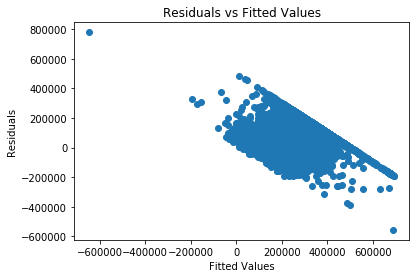

In [7]:
# Model Assessment
plt.scatter(lr.fittedvalues, lr.resid) #Residual vs fitted value plot
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show() 
#We can see some outliers, and pattern in residual plot.

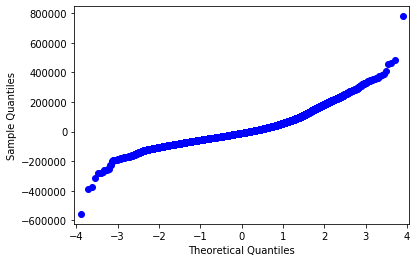

In [8]:
fig = sm.qqplot(lr.resid) #QQ Plot
#it shows a very slight curvature

(array([8., 2., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([1.56414287e-02, 2.18541034e+02, 4.37066427e+02, 6.55591819e+02,
        8.74117212e+02, 1.09264260e+03, 1.31116800e+03, 1.52969339e+03,
        1.74821878e+03, 1.96674417e+03, 2.18526957e+03]),
 <a list of 10 Patch objects>)

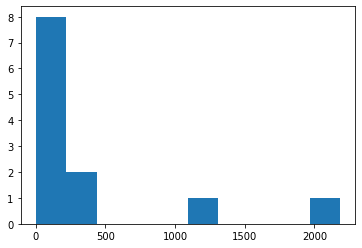

In [9]:
#check the veriable standard deviation
plt.hist(X1.std())

Currently, the coefficients of the variables are quite different, from -6.19 to 1.5e+05. Therefore, we may need to standardize the variables. The potential transformations includes: longitude, latitude, median_income, and dummy variable ocean_proximity. 

(b) Create a new variable called median house category. This variable consists of 0
and 1, where 0 if median house value is less than or equal to it's median value,
and 1 otherwise.

In [10]:
House['MedianHouseCategory'] = pd.qcut(House['median_house_value'], 
                                      q = [0,0.5,1], labels = [0,1])
House.head(15)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,oce_pro_INLAND,oce_pro_ISLAND,oce_pro_NEAR BAY,oce_pro_NEAR OCEAN,MedianHouseCategory
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0,1
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0,0,1,0,1
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,0,0,1,0,1
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,0,0,1,0,1
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,0,0,1,0,1
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,0,0,1,0,1


(c) Build a logistic regression model using all features and all observations. Provide
interpretations to the following predictors: longitude, housing median age, and
population.

In [11]:
#define X and y
X2 = House.copy()
X2.drop(["median_house_value","MedianHouseCategory"], inplace = True, axis = 1)
X2_con = sm.add_constant(X1)
y2 = House.MedianHouseCategory

In [12]:
from sklearn.linear_model import LogisticRegression
logit=sm.Logit(y2,X2_con).fit()
logit.summary()

         Current function value: 0.362636
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     MedianHouseCategory   No. Observations:                20433
Model:                           Logit   Df Residuals:                    20420
Method:                            MLE   Df Model:                           12
Date:                 Tue, 19 May 2020   Pseudo R-squ.:                  0.4768
Time:                         16:29:37   Log-Likelihood:                -7409.7
converged:                       False   LL-Null:                       -14163.
Covariance Type:             nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -115.0910      4.829    -23.831      0.000    -124.556    -105.626
longitude             -1.2786      0.057    -22.429      0.000      -1.390      -1.167
latitude              -1.2057      0.058    -20.686      0.000      -1.320      -1.091
housing_median_age     0.0245      0.002     12.573      0.000       0.021       0.028
total_rooms           -0.0002   3.77e-05     -5.895      0.000      -0.000      -0.000
total_bedrooms         0.0028      0.000      8.669      0.000       0.002       0.003
population            -0.0014   5.75e-05    -24.146      0.000      -0.002      -0.001
households             0.0027      0.000      7.691      0.000       0.002       0.003
median_income          1.2411      0.024     50.744      0.000       1.193       1.289
oce_pro_INLAND        -1.2714      0.080    -15.887      0.000      -1.428      -1.115
oce_pro_ISLAND        22.7913    6.1e+04      0.000      1.000    -1.2e+05     1.2e+05
oce_pro_NEAR BAY      -0.7287      0.080     -9.112      0.000      -0.885      -0.572
oce_pro_NEAR OCEAN    -0.4246      0.065     -6.533      0.000      -0.552      -0.297
======================================================================================
"""

### 3. Predictions:

(a) Split your data into training and holdout set. Use a split of 75-25 ratio. Use the
last 3 digits of your ID as random seed (if it starts with a 0, use the last 4 digits).

In [13]:
from sklearn import linear_model # For LASSO and Ridge
from sklearn import metrics # For evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
# Dividing training/validation and testing set
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X1, y1, test_size=0.25, random_state = 999)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size = 0.25, random_state = 999)

In [15]:
# Scale data (only fit with the training data, and transform both the training and validation data)
scaler = StandardScaler() # Instantiate
scaler.fit(X_train) # Fit the data
X_train = pd.DataFrame(scaler.transform(X_train)) # Transform the data
X_valid = pd.DataFrame(scaler.transform(X_valid)) # Transform the validation set
X_train.columns = X1.columns.values
X_valid.columns = X1.columns.values
X_test.columns = X1.columns.values

(b) Build a Lasso regression model and Random Forest Regression model using the
training set to predict the house median value variable. Perform prediction on
the testing set. Report the MSE.

In [16]:
# Lasso Regression Model
import itertools 
from sklearn.linear_model import Lasso # For LASSO
# Predefine the hyperparameters
lambdas = np.logspace(-10,10,21)   # We will use lambda on powers of 10 scale
max_iter = [50,70,90]   #We select three numbers
hyperparameter_pairs = list(itertools.product(lambdas, max_iter))

Validation_Scores = []     
for pairs in hyperparameter_pairs:
    lasso = Lasso(alpha = pairs[0], max_iter = pairs[1])
    lasso.fit(X_train, y_train) # Fit model on training set
    Validation_Scores.append(metrics.mean_squared_error(lasso.predict(X_valid), y_valid)) 
    # Evaluate model on test set

# Find the minimum validation error, and it's minimizer
min_mse = min(Validation_Scores)
best_pairs1 = hyperparameter_pairs[np.argmin(Validation_Scores)]

print("Minimum MSE on validation set is: ", min_mse)    
print("Best_pairs:", best_pairs1)

Minimum MSE on validation set is:  4717045752.118653
Best_pairs: (1e-10, 50)


In [17]:
# Random Forest Regression model
from sklearn.ensemble import RandomForestRegressor
# Predefine the hyperparameters
features = range(2,13)
min_samples_leaf = range(5,10)
hyperparameter_pairs = list(itertools.product(features, min_samples_leaf))

from sklearn.model_selection import cross_val_score

score = []
for pairs in hyperparameter_pairs:
    RF = RandomForestRegressor(n_estimators = 100, #Number of trees
                           max_features = pairs[0],    #How many features to randomly choose in each node 
                           min_samples_leaf = pairs[1]) #Minimum number of observations at each terminal node
    RF.fit(X_train, y_train)
    score.append(-cross_val_score(RF, X_valid, y_valid, scoring = 'neg_mean_squared_error').mean())

min_mse = min(score)
best_pairs2 = hyperparameter_pairs[np.argmin(score)]
print("Minimum MSE on validation set: ", min_mse) 
print("Best_pairs:", best_pairs2)

Minimum MSE on validation set:  3295067870.6380987
Best_pairs: (6, 5)


We will choose Random Forest Regression Model, since its MSE is less than the MSE of Lasso Regression.

(c) Compare the predictors selected by the two final models. Briefly describe your
observations.

In [18]:
# Scale data (use the train_valid set to fit, then transform both the train_valid set and test set)
scaler = StandardScaler() # Instantiate
scaler.fit(X_train_valid) # First fit the data, 

X_train_valid = pd.DataFrame(scaler.transform(X_train_valid)) # Then transform the data.
X_test = pd.DataFrame(scaler.transform(X_test))
# Remember, the steps are fit, then transform

In [19]:
# Refit Lasso model with selected best pair
lasso = Lasso(alpha = best_pairs1[0], max_iter = best_pairs1[1])
lasso.fit(X_test, y_test)
#print(pd.DataFrame(zip(lasso.coef_,X.columns)))
#sort the variables
NameOfVariables = House.columns.values
Var_coef = zip(lasso.coef_ , NameOfVariables)
sorted(Var_coef)

[(-46786.44324462292, 'longitude'),
 (-46761.51393730974, 'latitude'),
 (-35119.94740387458, 'population'),
 (-20870.758285926135, 'total_rooms'),
 (-17785.11935710026, 'median_house_value'),
 (-675.6943108776712, 'oce_pro_ISLAND'),
 (1015.8510658947773, 'oce_pro_NEAR BAY'),
 (1751.2431173835598, 'oce_pro_INLAND'),
 (12383.442022533764, 'households'),
 (16610.7250719054, 'housing_median_age'),
 (53476.30761191396, 'total_bedrooms'),
 (76285.82401251333, 'median_income')]

In [20]:
# Refit Random Forest Regression model with selected best pair
RF = RandomForestRegressor(n_estimators = 100, 
                           max_features = best_pairs2[0],     
                           min_samples_leaf = best_pairs2[1])     
RF.fit(X_test,y_test)
sorted(zip(RF.feature_importances_,NameOfVariables))

[(0.0, 'oce_pro_INLAND'),
 (0.0024388809282087313, 'oce_pro_ISLAND'),
 (0.005518172473928648, 'oce_pro_NEAR BAY'),
 (0.021558763051983097, 'households'),
 (0.02643834300930421, 'total_bedrooms'),
 (0.03397412060036893, 'total_rooms'),
 (0.03955008361549271, 'population'),
 (0.050451218978912346, 'housing_median_age'),
 (0.09377477668894403, 'latitude'),
 (0.09448337135197757, 'longitude'),
 (0.1615294103974068, 'median_house_value'),
 (0.47028285890347277, 'median_income')]

When we compare the 2 models, the Lasso model shows that "median_income", "total_bedrooms", "longitude", "latitude", "population" and "total_rooms" are the 6 most significant variables. While the Random Forest model shows that "median_income", "median_house_value", "longitude", "latitude", "housing_median_age" and "population" are the 6 most important features. Two models have 4 same variables among the 6 important variables. "oce_pro_ISLAND", "oce_pro_INLAND" and "oce_pro_NEAR BAY" are the least important variables for both models.

(d) Build a KNN classifier, decision tree, and boosted tree, to predict the house median
category variable. Perform prediction on the testing set. Report the precision score.

In [21]:
# Dividing training/validation and testing set
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.25, random_state = 999)
# Scale data (first fit, then transform)
scaler = StandardScaler() # Instantiate
scaler.fit(X_train) # First fit the data
X_train = pd.DataFrame(scaler.transform(X_train)) # Then transform the data
X_test = pd.DataFrame(scaler.transform(X_test)) # Transform the testing set
X_train.columns = X2.columns.values
X_test.columns = X2.columns.values

In [22]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
# Set up pipeline and grid search
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Pipeline setup
estimator = Pipeline(steps = [('scale', StandardScaler()), # Scale data
                     ('knn', KNeighborsClassifier()) ]) # Fit the scaled data using KNN

# Set up the parameters for each item in the pipeline
parameters = {'knn__n_neighbors': range(1,21),
             'knn__p': [1,2,3,4]}

clf = GridSearchCV(estimator = estimator, param_grid = parameters, cv = 5, 
                   scoring = 'accuracy', n_jobs = -1) # Instantiate the gridsearch
clf.fit(X_train, y_train) # Fit the grid search, i.e. perform CV and grid search. 
print(clf.best_params_) 

{'knn__n_neighbors': 14, 'knn__p': 1}


In [23]:
# Perform evaluation on the test set. Report the final accuracy score.
np.mean(clf.predict(X_test) == y_test)

0.8561362301820317

In [24]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Set up randomized search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

decision_tree =  DecisionTreeClassifier() # There is no preprocessing, so we just have one input
paras = {'max_depth': randint(1,10),
        'max_leaf_nodes': randint(1,10)} # Discrete uniform distribution between 1 and 10

clf_random = RandomizedSearchCV(decision_tree, paras, n_jobs = -1, cv = 5, n_iter = 100, random_state = 999) 
clf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [25]:
# The best parameters
print("Best_paras: ", clf_random.best_params_) 
# Accuracy on the test set
print("The precision score is: ", np.mean(clf_random.predict(X_test) == y_test)) 

Best_paras:  {'max_depth': 9, 'max_leaf_nodes': 9}
The precision score is:  0.8027011156782149


[Text(195.3, 199.32, 'median_income <= 0.12\ngini = 0.5\nsamples = 5109\nvalue = [2522, 2587]'),
 Text(139.5, 163.07999999999998, 'oce_pro_INLAND <= 0.386\ngini = 0.429\nsamples = 3179\nvalue = [2189, 990]'),
 Text(111.60000000000001, 126.83999999999999, 'median_income <= -0.494\ngini = 0.498\nsamples = 1960\nvalue = [1047, 913]'),
 Text(55.800000000000004, 90.6, 'latitude <= -0.737\ngini = 0.428\nsamples = 959\nvalue = [661, 298]'),
 Text(27.900000000000002, 54.359999999999985, 'gini = 0.321\nsamples = 487\nvalue = [389, 98]'),
 Text(83.7, 54.359999999999985, 'gini = 0.488\nsamples = 472\nvalue = [272, 200]'),
 Text(167.4, 90.6, 'longitude <= 0.64\ngini = 0.474\nsamples = 1001\nvalue = [386, 615]'),
 Text(139.5, 54.359999999999985, 'latitude <= 1.078\ngini = 0.396\nsamples = 545\nvalue = [148, 397]'),
 Text(111.60000000000001, 18.119999999999976, 'gini = 0.329\nsamples = 473\nvalue = [98, 375]'),
 Text(167.4, 18.119999999999976, 'gini = 0.424\nsamples = 72\nvalue = [50, 22]'),
 Text(1

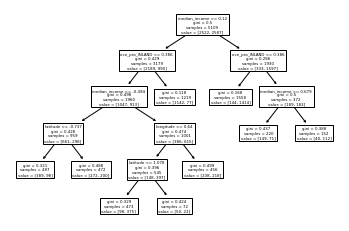

In [26]:
from sklearn import tree
DecisionTree = DecisionTreeClassifier(max_depth = 9, max_leaf_nodes = 9, random_state = 999)
DecisionTree.fit(X_test, y_test)
tree.plot_tree(DecisionTree, feature_names = X_test.columns.values)

In [27]:
#Boosted Tree
from sklearn.ensemble import GradientBoostingClassifier
# Predefine the hyperparameters
depth = range(1,5)
min_samples_leaf = range(5,10)
hyperparameter_pairs = list(itertools.product(depth, min_samples_leaf))

score = []
for pairs in hyperparameter_pairs:
    GBC_Tree = GradientBoostingClassifier(learning_rate = 0.01, # tuning parameter, usually between 0.01 and 0.1
                                             n_estimators = 100, #This is B, a tuning parameter, using large B can cause overfitting, default=100
                                             max_depth = pairs[0], #This is d, another tuning parameter, usually max_depth < 5
                                             min_samples_leaf = pairs[1],
                                             random_state = 999)
    score.append(-cross_val_score(GBC_Tree, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs = -1).mean())

min_mse = min(score)
best_pairs3 = hyperparameter_pairs[np.argmin(score)]
print("Minimum MSE on training set: ", min_mse) 
print("Best_pairs:", best_pairs3)

Minimum MSE on training set:  0.1721482543157608
Best_pairs: (4, 5)


In [28]:
#Put our best training model into practice
from sklearn.model_selection import KFold 
kf = KFold(n_splits = 5, shuffle = True) #5 fold CV

GBC_Tree = GradientBoostingClassifier(learning_rate = 0.01,
                                      n_estimators = 100,
                                      max_depth = best_pairs3[0],
                                      min_samples_leaf = best_pairs3[1],
                                      random_state = 999)
scores = []
for train_index, test_index in kf.split(X2):        
        GBC_Tree.fit(X2.iloc[train_index], y2.iloc[train_index])
        y_hat_test = GBC_Tree.predict(X2.iloc[test_index]) 
        scores.append(float(sum(y_hat_test == y2.iloc[test_index]))/len(y_hat_test))
CorrectClass = np.mean(scores)    

print("The precision score is: ",CorrectClass) 

The precision score is:  0.8273870291306041


Using the precision score, the best model is KNN Classifier.

### 4. PCA:

(a) Reload the original data set, drop the missing observations and convert the categorical
variable(s) into dummy variables (do not drop anything).

In [29]:
#reload the original data set
House = pd.read_csv('housing.csv')
#drop the missing value
House.dropna(inplace = True)
#convert the categoical variables
ocean_pro_dummy  = pd.get_dummies(House['ocean_proximity'], prefix = 'oce_pro')
del House['ocean_proximity']
House = pd.concat([House, ocean_pro_dummy], axis=1)
House.shape 
#20433 observations and 13 features, 1 dependent variable

(20433, 14)

In [30]:
House.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,oce_pro_<1H OCEAN,oce_pro_INLAND,oce_pro_ISLAND,oce_pro_NEAR BAY,oce_pro_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


(b) Perform PCA and plot the scree plot.

In [31]:
from sklearn.decomposition import PCA
#define X and y
X3 = House.copy()
X3.drop("median_house_value", inplace = True, axis = 1)
y3 = House["median_house_value"]

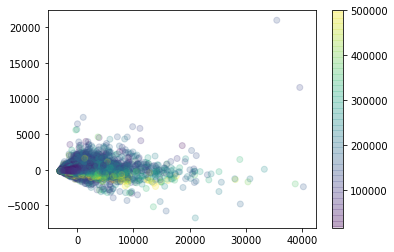

In [32]:
pca = PCA(0.99)
X_trans = pca.fit_transform(X3)
plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y3, alpha=0.2)
plt.colorbar()

(c) How many principal components do you need to cover 90% variability?

In [33]:
# Fit the PCA
X_trainS = StandardScaler().fit_transform(X_train)
pca = PCA().fit(X_trainS)

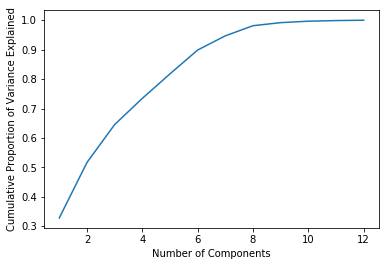

In [34]:
# Plot the scree plot
plt.plot(range(1, 13), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.show()
# Number of components is what you see in the graph +1 ! (we could easily solve this)

We need 7 principal components to cover 90% variability.

## Thank you.